## Getting Started
### Importar *Packages* e *Libraries* necessários 

In [23]:
import pandas as pd
import numpy as np
import urllib.request 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.display import Image
from osgeo import ogr
from qgis import processing
from qgis.core import *
from qgis.gui import *
from qgis.PyQt.QtGui import QColor, QImage
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'/usr/share/qgis/python')
QgsApplication.setPrefixPath("/usr/", True)

## Importar *Datasets*
### Ler ficheiros CSV

In [2]:
# Datasets COVID-19 Mundial
covid19LocalizacoesM = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/locations.csv")
covid19CasosM = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_cases.csv")
covid19MortesM = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/total_deaths.csv")
covid19RecuperadosM = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

# Daset COVID-19 Portugal
covid19PT1 = pd.read_csv("https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv")
covid19PT2 = pd.read_csv("https://raw.githubusercontent.com/jgrocha/covid-pt/master/situacao_epidemiologica.csv")

# Dataset Reservas Aéreas União Europeia
reservasUE = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosReservasAereasUE.csv")

# Dataset Reservas Aéreas Portugal
reservasPT = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosReservasAereasPT.csv")

# Dataset Apoios por Região a Microempresas Turismo Portugal
turismoRegiaoPT = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosApoioTurismoRegiaoPT.csv")

# Dataset Apoios por Tipologia a Microempresas Turismo Portugal
turismoTipologiaPT = pd.read_csv("https://raw.githubusercontent.com/diogoesnog/COVID-19/master/Conjunto%20de%20Dados/Dados%20CSV/dadosApoioTurismoTipologiaPT.csv")

## Estudo dos Dados
### Dados Mundias

#### 1. Mapa Países Afetados
Listagem de todos Países Afetados e a contagem dos mesmos, de modo a conseguir obter uma ideia mais precisa perante o mapa apresentado a seguir.

Layer MapaMundial30Abril loaded


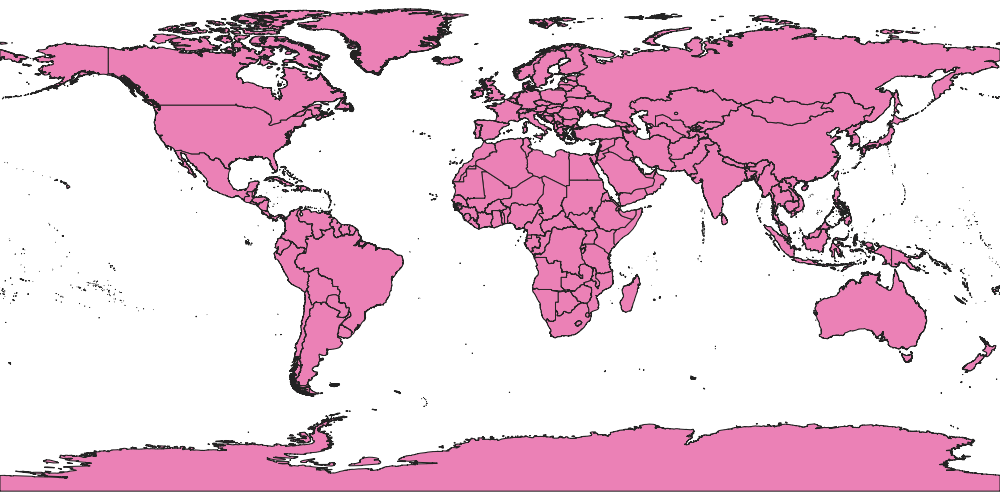

In [35]:
mapaMundialPaisesAfetados = "Conjunto de Dados/Mapas GKPG/MapaMundialPaisesAfetados.gpkg"
conn = ogr.Open(mapaMundialPaisesAfetados)

for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(mapaMundialPaisesAfetados, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

finalAbril = QgsProject.instance().mapLayersByName('MapaMundial30Abril')[0]
xt = finalAbril.extent()
width  = 1000
height = 500

options = QgsMapSettings()
options.setLayers([finalAbril])
options.setBackgroundColor(QColor(255, 255, 255))
options.setOutputSize(QSize(width, height))
options.setExtent(xt)
            
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()

imgbuf = QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save(imgbuf,"PNG")
Image(imgbuf.data())

In [3]:
countries = covid19LocalizacoesM['location'].unique().tolist()

print(countries)
print("\n")
print("Quantidade Países Afetados COVID-19 (Até à Data Atual do Notebook): %s" %len(countries))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'International', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Swaziland', 'Ethiopia', 'Falkland Islands', 'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 

#### 2. Lista de Casos de COVID-19
Divulgação da quantidade de casos ativos e distinção entre as mortes e casos recuperados deste valor total.

In [4]:
print("Total Casos COVID-19 Mundial (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19CasosM['World'].iloc[-1]))
print("Total Mortes COVID-19 Mundial (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19MortesM['World'].iloc[-1]))
print("Total Recuperados COVID-19 Mundial (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19RecuperadosM.iloc[:,-1].sum()))

Total Casos COVID-19 Mundial (Até à Data Atual do Notebook): 3,214,256
Total Mortes COVID-19 Mundial (Até à Data Atual do Notebook): 232,570
Total Recuperados COVID-19 Mundial (Até à Data Atual do Notebook): 1,053,327


#### 3. Gráficos Total Casos, Total de Mortes e relação entre os dois

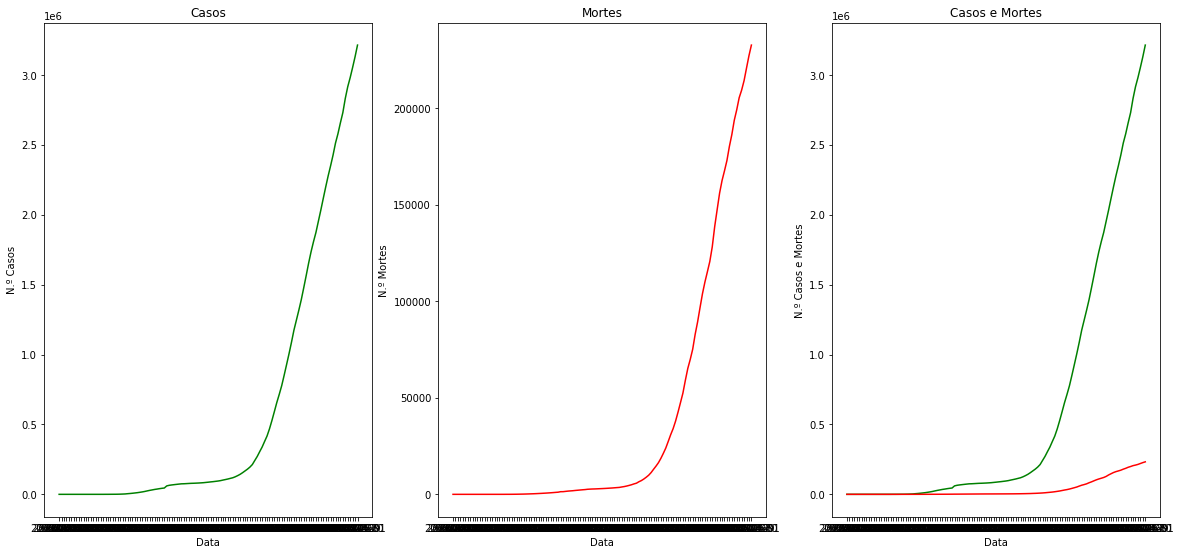

In [5]:
totalCasosMundial = covid19CasosM.sort_values(by=['date'])
x1 = totalCasosMundial.date
y1 = totalCasosMundial.World

totalMortesMundial = covid19MortesM.sort_values(by=['date'])
x2 = totalMortesMundial.date
y2 = totalMortesMundial.World

plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.title('Casos')
plt.xlabel('Data')
plt.ylabel('N.º Casos')
plt.plot(x1,y1, color='green')

plt.subplot(2,3,2)
plt.title('Mortes')
plt.xlabel('Data')
plt.ylabel('N.º Mortes')
plt.plot(x2,y2, color='red')

plt.subplot(2,3,3)
plt.title('Casos e Mortes')
plt.xlabel('Data')
plt.ylabel('N.º Casos e Mortes')
plt.plot(x1,y1, color='green')
plt.plot(x2,y2, color='red')
plt.show()

### Dados Portugal

#### 1. Mapa Portugal Afetados
Listagem de todos os concelhos/distritos afetados, bem como o número de casos confirmados para cada um deles.

#### 2. Lista Casos COVID-19
Divulgação da quantidade de casos ativos e distinção entre as mortes e casos recuperados deste valor total.

In [ ]:
print("Total Casos COVID-19 Portugal (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19PT1['confirmados'].iloc[-1]))
print("Total Mortes COVID-19 Portugal (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19PT1['obitos'].iloc[-1]))
print("Total Recuperados COVID-19 Portugal (Até à Data Atual do Notebook): %s" %"{:,}".format(covid19PT1['recuperados'].iloc[-1]))

#### 3. Gráficos Total Casos, Total de Mortes e relação entre os dois

Text(0, 0.5, 'N.º Novas Mortes Diários')

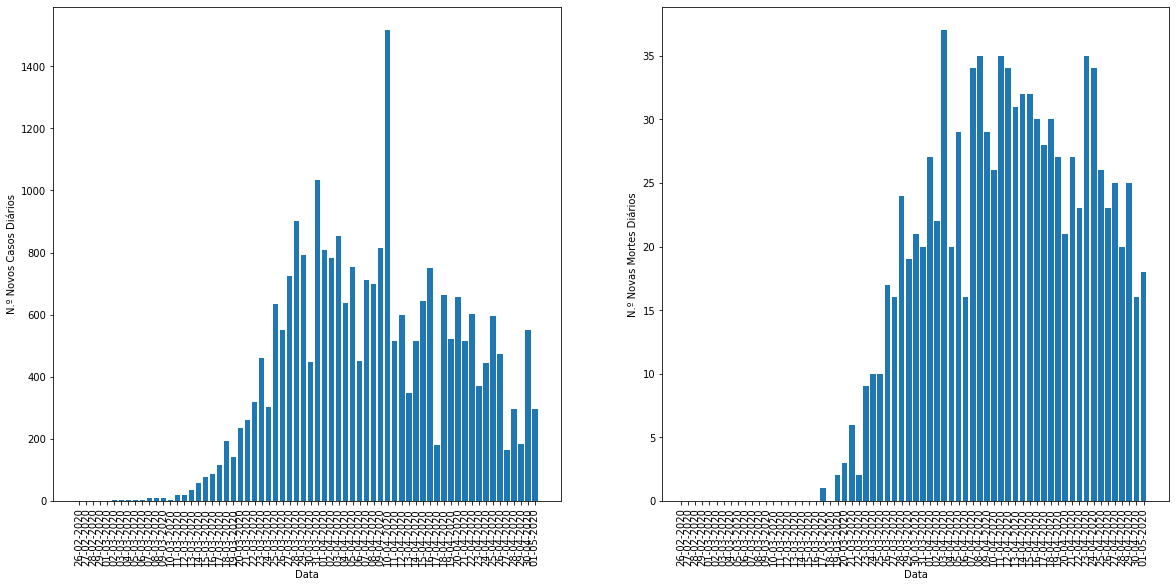

In [8]:
tickLabel = covid19PT1['data']

plt.figure(figsize=(20,20))

x1 = np.arange(len(covid19PT1))
y1 = covid19PT1['confirmados_novos']
ax1 = plt.subplot(2,2,1)
plt.bar(x1, y1, tick_label = tickLabel)
plt.xticks(rotation = 90)
plt.xlabel('Data')
plt.ylabel('N.º Novos Casos Diários')

x2 = np.arange(len(covid19PT1))
y2 = abs(covid19PT1['obitos'].shift(1) - covid19PT1['obitos'])
plt.subplot(2,2,2)
plt.bar(x2, y2, tick_label = tickLabel)
plt.xticks(rotation = 90)
plt.xlabel('Data')
plt.ylabel('N.º Novas Mortes Diários')

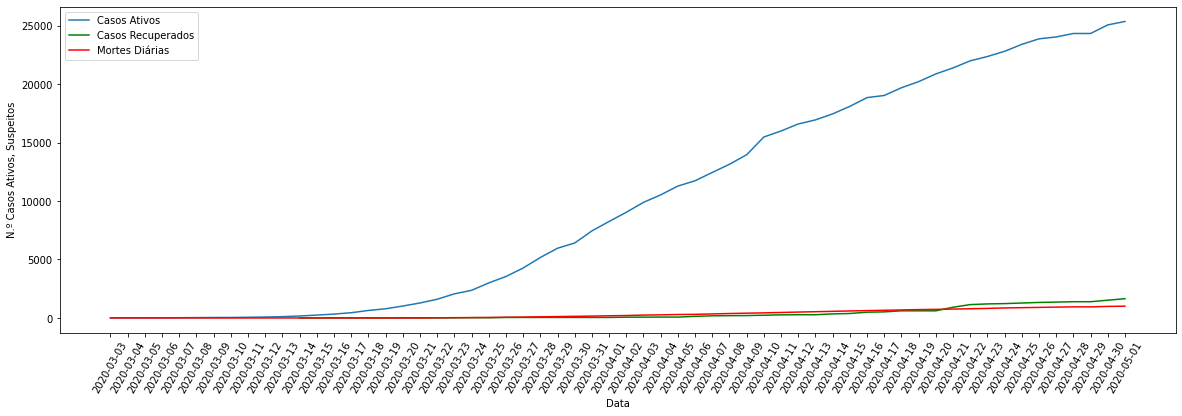

In [9]:
covid19Portugal = covid19PT2.sort_values(by=['data_relatorio'])

x = covid19Portugal.data_relatorio
y = covid19Portugal.confirmados
z = covid19Portugal.recuperados
a = covid19Portugal.obitos

plt.figure(figsize=(20,6))
plt.plot(x, y, label= "Casos Ativos")
plt.plot(x, z, label = "Casos Recuperados", color = "green")
plt.plot(x, a, label = "Mortes Diárias", color = "red")

plt.xticks(rotation = 60)
plt.xlabel('Data')
plt.ylabel('N.º Casos Ativos, Suspeitos')

plt.legend(loc="best")
plt.show()

### Dados Turismo Portugal

#### 1. Estudo do Impacto do COVID-19 nas Reservas de Voos
Este estudo serve para analisar/estudar o impacto do vírus COVID-19 sobre as reservas de voos efetuadas em agências de viagens.

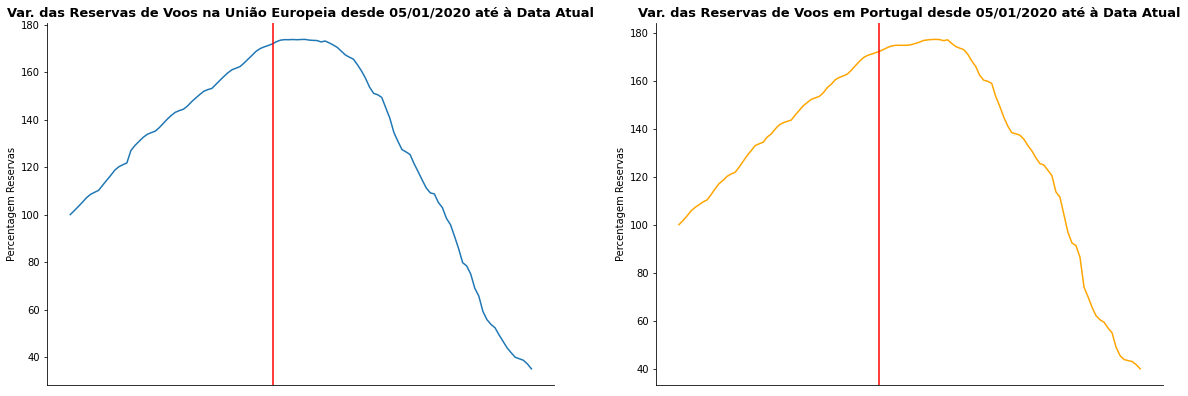

In [10]:
plt.figure(figsize=(20,20)).subplots_adjust(hspace=1)

import datetime as dt

ax1 = plt.subplot(2,2,1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
x1 = np.arange(len(reservasUE))
y1 = reservasUE['Reservas']
plt.plot(x1, y1)
plt.axvline(x=50, color = 'red')
plt.title('Var. das Reservas de Voos na União Europeia desde 05/01/2020 até à Data Atual', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Percentagem Reservas')

ax2 = plt.subplot(2,2,2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
x2 = np.arange(len(reservasPT))
y2 = reservasPT['Reservas']
plt.plot(x2, y2, color = "orange")
plt.axvline(x=50, color = 'red')
plt.title('Var. das Reservas de Voos em Portugal desde 05/01/2020 até à Data Atual', fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.ylabel('Percentagem Reservas')
plt.show()

#### 2. Estudo das Candidaturas à Linha de Apoio à Tesouraria de Microempresas ligadas ao Turismo
Este estudo serve para analisar/estudar o impacto do vírus COVID-19 sobre a quantidade de apoio fornecida a microempresas.

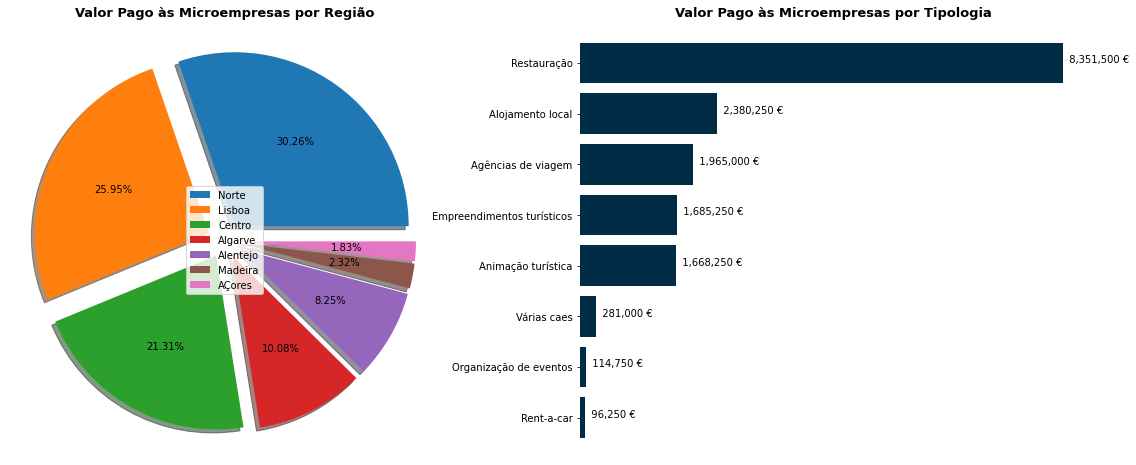

In [11]:
plt.figure(figsize=(20,20)).subplots_adjust(hspace=.5)

ax1 = plt.subplot(2,2,1)
explode = turismoRegiaoPT['Valor Pago'].apply(lambda x:x > 100)
explode = explode.apply(lambda x:0.1 if x == True else 0)

plt.pie(turismoRegiaoPT['Valor Pago'], explode=explode, autopct = '%1.2f%%', shadow=True)

plt.legend(turismoRegiaoPT['Região'], loc = "center")
plt.title("Valor Pago às Microempresas por Região", fontdict={'fontsize': 13, 'fontweight': 'bold'})

tipologia = turismoTipologiaPT.sort_values(by=['Valor Pago'], ascending=True)
ax2 = plt.subplot(2,2,2)
ax2.axes.get_xaxis().set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
x1 = tipologia['Tipologia']
y1 = tipologia['Valor Pago']
plt.barh(x1, y1, color = "#002c46")

for i, v in enumerate(y1):
    ax2.text(v , i , str("  {:,}".format(v) + " €"))

plt.title("Valor Pago às Microempresas por Tipologia", fontdict={'fontsize': 13, 'fontweight': 'bold'})
plt.show()